This is weej 03 of the ML Zoomcamp course offered by Alexey Grigorev and dataTalks.Club

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.columns = df.columns.str.lower()\
                       .str.replace(" ", "_")

In [8]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [17]:
df.isnull().sum().sort_values(ascending=False)

totalcharges        11
customerid           0
deviceprotection     0
monthlycharges       0
paymentmethod        0
paperlessbilling     0
contract             0
streamingmovies      0
streamingtv          0
techsupport          0
onlinebackup         0
gender               0
onlinesecurity       0
internetservice      0
multiplelines        0
phoneservice         0
tenure               0
dependents           0
partner              0
seniorcitizen        0
churn                0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [12]:
df["totalcharges"] = pd.to_numeric(df['totalcharges'], errors="coerce")

In [14]:
df["totalcharges"].isnull().sum()

11

In [19]:
df["totalcharges"] = df["totalcharges"].fillna(value=0)

> **New**

In [25]:
df["churn"] = (df["churn"] == 'Yes').astype(int)

In [26]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [32]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [33]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [34]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [35]:
y_train = df_train["churn"].values
y_val = df_val["churn"].values
y_test = df_test["churn"].values

In [36]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

### EDA


In [37]:
df_train_full.isnull().mean().sort_values(ascending=False)

customerid          0.0
deviceprotection    0.0
totalcharges        0.0
monthlycharges      0.0
paymentmethod       0.0
paperlessbilling    0.0
contract            0.0
streamingmovies     0.0
streamingtv         0.0
techsupport         0.0
onlinebackup        0.0
gender              0.0
onlinesecurity      0.0
internetservice     0.0
multiplelines       0.0
phoneservice        0.0
tenure              0.0
dependents          0.0
partner             0.0
seniorcitizen       0.0
churn               0.0
dtype: float64

In [39]:
df_train_full["churn"].value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

> Churn rate: 26.99%

In [40]:
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [41]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [42]:
df_train_full.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [95]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [96]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature Importance

In [49]:
churn_female = df_train_full[df_train_full["gender"] == 'Female']["churn"].mean()

In [50]:
churn_male = df_train_full[df_train_full["gender"] == 'Male']["churn"].mean()

In [97]:

for col in categorical:
    df_risk_group = df_train_full.groupby(col)['churn'].agg(['mean', 'count'])

    df_risk_group['diff'] = df_risk_group['mean'] - 0.2699
    df_risk_group['risk'] = df_risk_group['mean']/ 0.2699
    display(df_risk_group)

,mean,count,diff,risk
gender,,,,
Female,0.276824,2796,0.006924,1.025654
Male,0.263214,2838,-0.006686,0.975226


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027630,0.897630
1,0.413377,912,0.143477,1.531594


,mean,count,diff,risk
partner,,,,
No,0.329809,2932,0.059909,1.221967
Yes,0.205033,2702,-0.064867,0.759664


,mean,count,diff,risk
dependents,,,,
No,0.313760,3968,0.043860,1.162505
Yes,0.165666,1666,-0.104234,0.613806


,mean,count,diff,risk
phoneservice,,,,
No,0.241316,547,-0.028584,0.894095
Yes,0.273049,5087,0.003149,1.011667


,mean,count,diff,risk
multiplelines,,,,
No,0.257407,2700,-0.012493,0.953714
No phone service,0.241316,547,-0.028584,0.894095
Yes,0.290742,2387,0.020842,1.077219


,mean,count,diff,risk
internetservice,,,,
DSL,0.192347,1934,-0.077553,0.712662
Fiber optic,0.425171,2479,0.155271,1.575292
No,0.077805,1221,-0.192095,0.288274


,mean,count,diff,risk
onlinesecurity,,,,
No,0.420921,2801,0.151021,1.559545
No internet service,0.077805,1221,-0.192095,0.288274
Yes,0.153226,1612,-0.116674,0.567713


,mean,count,diff,risk
onlinebackup,,,,
No,0.404323,2498,0.134423,1.498049
No internet service,0.077805,1221,-0.192095,0.288274
Yes,0.217232,1915,-0.052668,0.804862


,mean,count,diff,risk
deviceprotection,,,,
No,0.395875,2473,0.125975,1.466749
No internet service,0.077805,1221,-0.192095,0.288274
Yes,0.230412,1940,-0.039488,0.853695


,mean,count,diff,risk
techsupport,,,,
No,0.418914,2781,0.149014,1.552108
No internet service,0.077805,1221,-0.192095,0.288274
Yes,0.159926,1632,-0.109974,0.592540


,mean,count,diff,risk
streamingtv,,,,
No,0.342832,2246,0.072932,1.270217
No internet service,0.077805,1221,-0.192095,0.288274
Yes,0.302723,2167,0.032823,1.121610


,mean,count,diff,risk
streamingmovies,,,,
No,0.338906,2213,0.069006,1.255674
No internet service,0.077805,1221,-0.192095,0.288274
Yes,0.307273,2200,0.037373,1.138469


,mean,count,diff,risk
contract,,,,
Month-to-month,0.431701,3104,0.161801,1.599485
One year,0.120573,1186,-0.149327,0.446733
Two year,0.028274,1344,-0.241626,0.104757


,mean,count,diff,risk
paperlessbilling,,,,
No,0.172071,2313,-0.097829,0.637536
Yes,0.338151,3321,0.068251,1.252876


,mean,count,diff,risk
paymentmethod,,,,
Bank transfer (automatic),0.168171,1219,-0.101729,0.623085
Credit card (automatic),0.164339,1217,-0.105561,0.608887
Electronic check,0.455890,1893,0.185990,1.689108
Mailed check,0.193870,1305,-0.076030,0.718302


### Mutual Information

In [72]:
from sklearn.metrics import mutual_info_score

In [73]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_train_full['churn'])

In [98]:
df_train_full[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [78]:
df_train_full

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,0
5946,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,1
3881,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,0
2389,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,0
3676,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-LKXBR,Male,1,No,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,918.60,1
5192,3507-GASNP,Male,0,No,Yes,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,1189.90,0
3980,8868-WOZGU,Male,0,No,No,28,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.70,2979.50,1
235,1251-KRREG,Male,0,No,No,2,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.10,1


### Correlation

In [82]:
df_train_full[numerical].corrwith(df_train_full['churn']).to_frame()

,0
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


#### Tenure vs. Churn rate
Let's look at relation between the customers tenure and churn rate.


In [83]:
df_train_full[df_train_full['tenure'] <=2]['churn'].mean()

0.5953420669577875

In [85]:
df_train_full[(df_train_full['tenure'] > 2) & (df_train_full['tenure'] <= 12)]['churn'].mean()

0.3994413407821229

In [86]:
df_train_full[df_train_full['tenure'] > 12]['churn'].mean()

0.17634908339788277

#### Monthly Charges vs Churn rate
Let's take a look at the monthly charges vs Churn rate

In [89]:
df_train_full[df_train_full['monthlycharges'] <= 20]['churn'].mean()

0.08795411089866156

In [90]:
df_train_full[(df_train_full['monthlycharges'] > 20) & (df_train_full['monthlycharges'] <=50)]['churn'].mean()

0.18340943683409436

In [91]:
df_train_full[df_train_full['monthlycharges'] > 50]['churn'].mean()

0.32499341585462205

As shown the correlation is positive

### One-hot encoding

 

DictVectorizer preserves the numerical column information while the categorical variables are one hot encoded. We fit the vectorizer on the training dataset and only transform the validation dataset.

In [92]:
from sklearn.feature_extraction import DictVectorizer

In [94]:
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [99]:
train_dicts = df_train[categorical+numerical].to_dict(orient="records")

In [101]:
dictvect = DictVectorizer(sparse=False)

In [102]:
dictvect.fit(train_dicts)

DictVectorizer(sparse=False)

In [103]:
dictvect.feature_names_

['contract=Month-to-month',
 'contract=One year',
 'contract=Two year',
 'dependents=No',
 'dependents=Yes',
 'deviceprotection=No',
 'deviceprotection=No internet service',
 'deviceprotection=Yes',
 'gender=Female',
 'gender=Male',
 'internetservice=DSL',
 'internetservice=Fiber optic',
 'internetservice=No',
 'monthlycharges',
 'multiplelines=No',
 'multiplelines=No phone service',
 'multiplelines=Yes',
 'onlinebackup=No',
 'onlinebackup=No internet service',
 'onlinebackup=Yes',
 'onlinesecurity=No',
 'onlinesecurity=No internet service',
 'onlinesecurity=Yes',
 'paperlessbilling=No',
 'paperlessbilling=Yes',
 'partner=No',
 'partner=Yes',
 'paymentmethod=Bank transfer (automatic)',
 'paymentmethod=Credit card (automatic)',
 'paymentmethod=Electronic check',
 'paymentmethod=Mailed check',
 'phoneservice=No',
 'phoneservice=Yes',
 'seniorcitizen',
 'streamingmovies=No',
 'streamingmovies=No internet service',
 'streamingmovies=Yes',
 'streamingtv=No',
 'streamingtv=No internet servic

In [104]:
X_train = dictvect.transform(train_dicts)

In [105]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [106]:
val_dicts = df_val[categorical+numerical].to_dict(orient="records")

In [107]:
X_val = dictvect.transform(val_dicts)

In [108]:
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

### Logistic Regression

$y_{i} = f(x_{i})$

Limits to values between 0 and 1, using a special function called `sigmoid` or `logit`.

$ \sigma(z) = \frac{1}{1+e^{-z}} $

where $\sigma(-\infty) = 0 $

In [109]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [111]:
z  = np.linspace(-10, 10, 100)

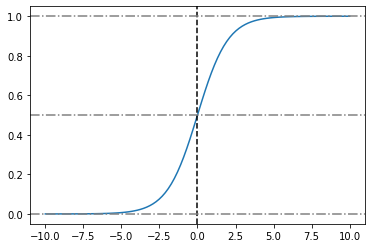

In [120]:
plt.plot(z, sigmoid(z))
plt.axvline(x=0,color='black', ls='--' )
plt.axhline(y=1.0, color='gray', ls='-.')
plt.axhline(y=0.5, color='gray', ls='-.')
plt.axhline(y=0.0, color='gray', ls='-.')

In [121]:
from sklearn.linear_model import LogisticRegression

In [125]:
model = LogisticRegression()

In [126]:
model.fit(X_train, y_train)

LogisticRegression()

In [127]:
model.intercept_

array([-0.10906984])

In [131]:
model.coef_.round(3)

array([[ 0.475, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
        -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
         0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
         0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
        -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
         0.213, -0.089, -0.232, -0.07 ,  0.   ]])

#### Hard predictions

In [132]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [133]:
model.predict_proba(X_train)

array([[0.90443048, 0.09556952],
       [0.32074291, 0.67925709],
       [0.36639176, 0.63360824],
       ...,
       [0.4684025 , 0.5315975 ],
       [0.95750228, 0.04249772],
       [0.30138089, 0.69861911]])

In [134]:
y_pred = model.predict_proba(X_val)

In [135]:
y_pred

array([[0.99100249, 0.00899751],
       [0.79563017, 0.20436983],
       [0.78794861, 0.21205139],
       ...,
       [0.8636199 , 0.1363801 ],
       [0.20029807, 0.79970193],
       [0.16265877, 0.83734123]])

The first column gives us the probability of user not churning and the second column the probability of user churning.

Now, define a threshold of 0.5, to identify the users who could churn out.

In [137]:
churning_users = (y_pred[:, 1] > 0.5)

In [139]:
df_val[churning_users]['customerid']

3       8433-WXGNA
8       3440-JPSCL
11      2637-FKFSY
12      7228-OMTPN
19      6711-FLDFB
           ...    
1397    5976-JCJRH
1398    2034-CGRHZ
1399    5276-KQWHG
1407    6521-YYTYI
1408    3049-SOLAY
Name: customerid, Length: 311, dtype: object

In [140]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [143]:
churning_users.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [145]:
(y_val == churning_users).mean()

0.8034066713981547

In [146]:
df_predictions = pd.DataFrame()
df_predictions['churn_probability'] = y_pred[:, 1]
df_predictions['predicted'] = churning_users.astype(int)
df_predictions['actual'] = y_val
df_predictions['correct_predictions'] = (df_predictions['predicted'] == df_predictions['actual'])

In [147]:
df_predictions['correct_predictions'].mean()

0.8034066713981547

### Model Interpretation

In [149]:
dict(zip(dictvect.feature_names_, model.coef_[0].round(3)))

{'contract=Month-to-month': 0.475,
 'contract=One year': -0.175,
 'contract=Two year': -0.407,
 'dependents=No': -0.03,
 'dependents=Yes': -0.078,
 'deviceprotection=No': 0.063,
 'deviceprotection=No internet service': -0.089,
 'deviceprotection=Yes': -0.081,
 'gender=Female': -0.034,
 'gender=Male': -0.073,
 'internetservice=DSL': -0.335,
 'internetservice=Fiber optic': 0.316,
 'internetservice=No': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=No': -0.258,
 'multiplelines=No phone service': 0.141,
 'multiplelines=Yes': 0.009,
 'onlinebackup=No': 0.063,
 'onlinebackup=No internet service': -0.089,
 'onlinebackup=Yes': -0.081,
 'onlinesecurity=No': 0.266,
 'onlinesecurity=No internet service': -0.089,
 'onlinesecurity=Yes': -0.284,
 'paperlessbilling=No': -0.231,
 'paperlessbilling=Yes': 0.123,
 'partner=No': -0.166,
 'partner=Yes': 0.058,
 'paymentmethod=Bank transfer (automatic)': -0.087,
 'paymentmethod=Credit card (automatic)': -0.032,
 'paymentmethod=Electronic check': 0.07,
 